In [48]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
from sklearn.datasets import make_classification

In [49]:
X, y = make_classification(
    n_features=10,
    n_samples=1000,
    n_informative=4,
    n_redundant=6,
    n_repeated=0,
    n_classes=2,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Logistic Regression Classifier

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r = classification_report(y_pred=y_pred, y_true=y_test)
print(r)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



### Threshold: 0.4 - improving the recall

In [51]:
probabilities = model.predict_proba(X_test)[:,1]
y_pred_04 =(probabilities > 0.4).astype(int)

r_04 = classification_report(y_pred=y_pred_04, y_true=y_test)
print(r_04)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=probabilities)
fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97927769, 0.80889618, 0.80837543, 0.80205328]))

In [53]:
tpr

array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625, 0.2890625,
       0.296875 , 0.296875 , 0.34375  , 0.34375  , 0.3515625, 0.3515625,
       0.375    , 0.375    , 0.3984375, 0.3984375, 0.4296875, 0.4296875,
       0.4375   , 0.4375   , 0.4609375, 0.4609375, 0.46875  , 0.46875  ,
       0.4765625, 0.4765625, 0.484375 , 0.484375 , 0.4921875, 0.4921875,
       0.5078125, 0.5078125, 0.515625 , 0.515625 , 0.5390625, 0.5390625,
       0.5546875, 0.5546875, 0.5859375, 0.5859375, 0.625    , 0.625    ,
       0.640625 , 0.640625 , 0.6484375, 0.6484375, 0.65625  , 0.65625  ,
       0.71875  , 0.71875  , 0.75     , 0.75     , 0.7578125, 0.7578125,
       0.765625 , 0.765625 , 0.7734375, 0.7734375, 0.7890625, 0.7890625,
       0.796875 , 0.796875 , 0.84375  , 0.84375  , 0.8515625, 0.8515625,
       0.859375 , 0.859375 , 0.8671875, 0.8671875, 0.875    , 0.875    ,
       0.8828125, 0.8828125, 0.890625 , 0.890625 , 0.90625  , 0.90625  ,
       0.9140625, 0.9140625, 0.921875 , 0.921875 , 

In [54]:
desired_recall = 0.9

closest_index = np.argmin(abs(tpr - desired_recall))
print(closest_index)





76


In [55]:
thresholds[closest_index]

0.2634933759430514

In [56]:
y_pred_desired =(probabilities > thresholds[closest_index]).astype(int)

r_pred_desired = classification_report(y_pred=y_pred_desired, y_true=y_test)
print(r_pred_desired)

              precision    recall  f1-score   support

           0       0.73      0.30      0.42       122
           1       0.57      0.90      0.70       128

    accuracy                           0.60       250
   macro avg       0.65      0.60      0.56       250
weighted avg       0.65      0.60      0.56       250



In [57]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.764856557377049

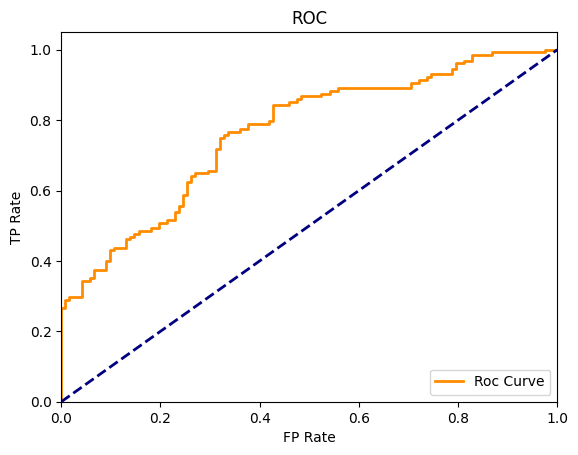

In [58]:
plt.plot(fpr, tpr, color="darkorange", lw=2, label="Roc Curve")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [59]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r = classification_report(y_pred=y_pred, y_true=y_test)
print(r)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



### 98% recall using XGBoost

In [60]:
desired_recall = 0.98
proba_xgb = model.predict_proba(X_test)[:,1]



In [61]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=proba_xgb)
fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.09375  , 0.09375  , 0.203125 ]),
 array([       inf, 0.99996376, 0.99989676, 0.999892  , 0.9997204 ],
       dtype=float32))

In [62]:
index = np.argmin(abs(tpr - desired_recall))
index

40

In [63]:
y_pred_desired = (proba_xgb >= thresholds[index]).astype(int)


In [64]:
r_98 = classification_report(y_pred=y_pred_desired, y_true=y_test)
print(r_98)

              precision    recall  f1-score   support

           0       0.93      0.33      0.48       122
           1       0.60      0.98      0.75       128

    accuracy                           0.66       250
   macro avg       0.77      0.65      0.62       250
weighted avg       0.76      0.66      0.62       250



In [65]:
area = auc(fpr, tpr)
area

0.946016905737705

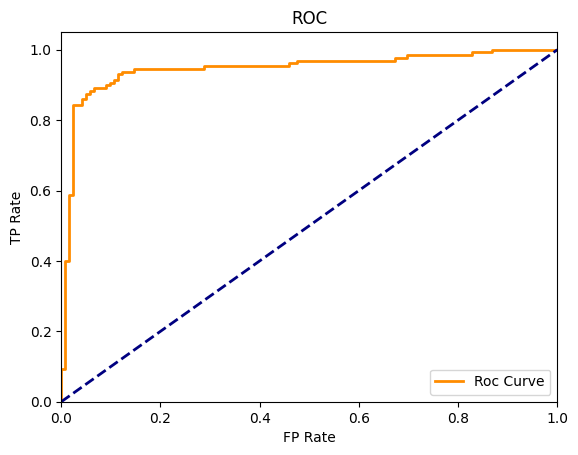

In [66]:
plt.plot(fpr, tpr, color="darkorange", lw=2, label="Roc Curve")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()